# Data Cleaning.
- Data cleaning is the process of preparing data for analysisML/DL by removing or modifying data that is incorrect, incomplete, irrelevent, duplicated, or improperly formatted.

- convert categorical data to numerical data.

## Steps of Data Cleaning.
- **Step 1: Handling Missing Values**
- **Step 2: Outlier Detectionand Handling**
- **Step 3: Data Scaling and Transformation**
- **Step 4: Encoding Categorical Variables**
- **Step 5: Handling Duplicates**
- **step 6: Dealing with Inconsistent Data**

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Handling Missing Values.

In [127]:
dataset = pd.read_csv('/Users/saurabhkannaujia/Desktop/Titanic-Dataset.csv')
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
dataset.shape # numbers of rows and columns

(891, 12)

In [129]:
dataset.isnull().sum() # Count of missing valuesin each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
dataset.isnull().sum().sum() # Total number of missing values

866

In [139]:
per = dataset.isnull().sum() / dataset.shape[0] * 100 # percentage of missing values in each column
per

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [132]:
dataset.isnull().sum().sum()/ (dataset.shape[0] * dataset.shape[1]) * 100 # percentage of missing values in the entire dataset.

8.099513655069211

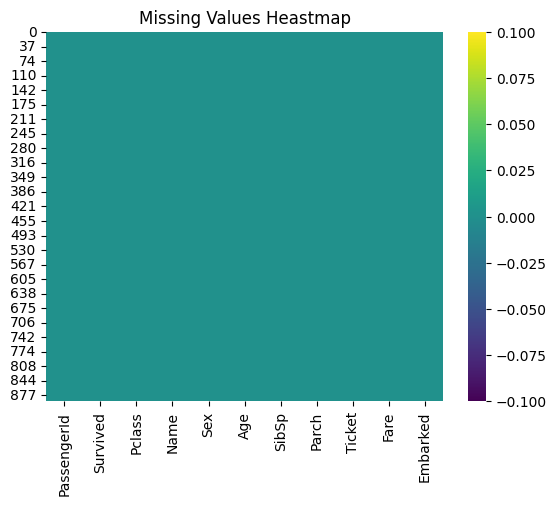

In [140]:
sns.heatmap(dataset.isnull(),cbar=True, cmap='viridis') # cbar=False remove the color bar 
plt.title('Missing Values Heastmap') # cmap='viridis' sets the color map to 'viridis'
plt.show()

# Handling Missing Values(DROPING).


In [134]:
# Dropping Missing Values in the columns.
dataset.drop(columns=['Cabin'],inplace=True) # inplace=True modidies the original DataFrame



In [138]:
# Dropping Missing Values in the rows.
dataset.dropna(inplace=True)

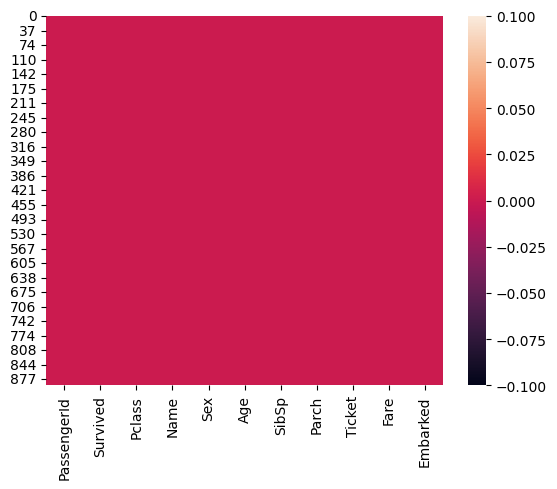

In [141]:
sns.heatmap(dataset.isnull())
plt.show()

In [137]:
dataset.shape

(712, 11)

In [143]:
((891-712) / 891 )*100 # Percengtage of rows dropped due to missing values

20.089786756453424